In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
data = pd.read_csv(r'D:\Titanic Project\data\train.csv')

In [220]:
df = data.copy()
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


1. Missing Values and Duplicate Values.

In [221]:
# First drop duplicate values
df.shape

(891, 12)

In [222]:
df.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [223]:
# Check for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

2. Visualization - Univariate

In [224]:
# Passenger ID is not useful for analysis. So, drop it.
df.drop('PassengerId', axis=1, inplace=True)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


<Axes: xlabel='Survived', ylabel='Count'>

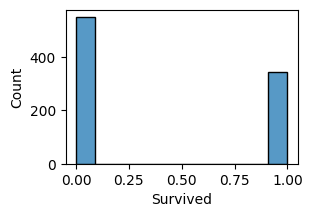

In [226]:
# Visualize Survived column
plt.figure(figsize=(3,2))
sns.histplot(df['Survived'])

In [227]:
# Percentage of people survived
df['Survived'].value_counts(normalize=True)*100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

<Axes: xlabel='Sex', ylabel='Count'>

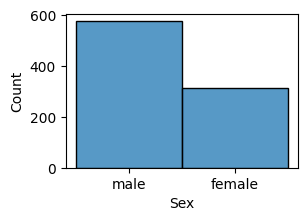

In [228]:
# Visualize Sex column
plt.figure(figsize=(3,2))
sns.histplot(df['Sex'])

In [229]:
# Percentages
df['Sex'].value_counts(normalize=True)*100

Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

<Axes: xlabel='Pclass', ylabel='Count'>

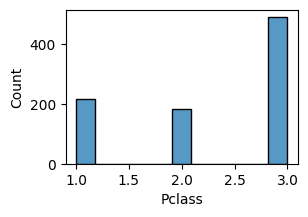

In [230]:
# Visualize Pclass column
plt.figure(figsize=(3,2))
sns.histplot(df['Pclass'])

In [231]:
df['Pclass'].value_counts(normalize=True)*100

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

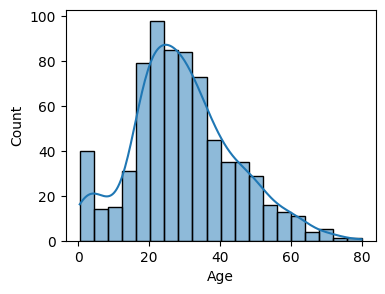

In [232]:
# Visualize Age column
plt.figure(figsize=(4,3))
sns.histplot(df['Age'], bins=20,kde=True)

In [233]:
# Create a new column Age_group
df['Age_group'] = pd.cut(df['Age'], bins=[0, 18, 60, 100], labels=['Children', 'Adult', 'Elderly'])

<Axes: xlabel='Age_group', ylabel='Count'>

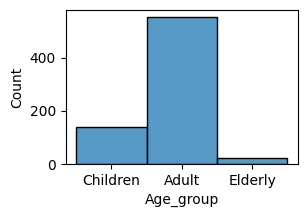

In [234]:
# Visualize Age_group column
plt.figure(figsize=(3,2))
sns.histplot(df['Age_group'])

<Axes: xlabel='SibSp', ylabel='Count'>

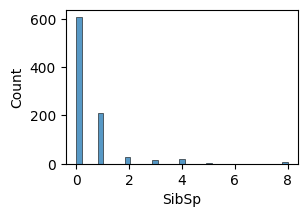

In [235]:
# Visualize SibSp column
plt.figure(figsize=(3,2))
sns.histplot(df['SibSp'])

In [236]:
# Create a new column SibSp_Group
df['SibSp_Group'] = pd.cut(df['SibSp'], bins=[-1, 1, 2, 10], labels=['None', 'One', 'Multiple'])

In [237]:
df['SibSp_Group'].isna().sum()

np.int64(0)

<Axes: xlabel='SibSp_Group', ylabel='Count'>

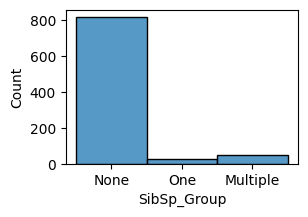

In [238]:
# Visualize SibSp_Group column
plt.figure(figsize=(3,2))
sns.histplot(df['SibSp_Group'])

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Name         891 non-null    object  
 3   Sex          891 non-null    object  
 4   Age          714 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Cabin        204 non-null    object  
 10  Embarked     889 non-null    object  
 11  Age_group    714 non-null    category
 12  SibSp_Group  891 non-null    category
dtypes: category(2), float64(2), int64(4), object(5)
memory usage: 78.7+ KB


<Axes: xlabel='Parch', ylabel='Count'>

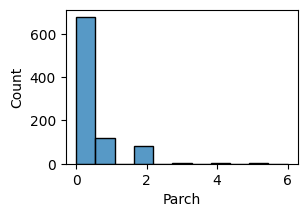

In [240]:
# Visualize Parch column
plt.figure(figsize=(3,2))
sns.histplot(df['Parch'])

In [241]:
# Create a new column Parch_Group
df['Parch_Group'] = pd.cut(df['Parch'], bins=[-1, 1, 2, 10], labels=['None', 'One', 'Multiple'])

<Axes: xlabel='Parch_Group', ylabel='Count'>

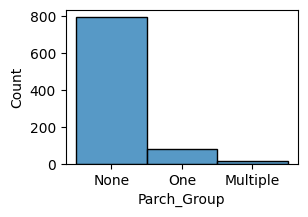

In [242]:
# Visualize Parch_Group column
plt.figure(figsize=(3,2))
sns.histplot(df['Parch_Group'])

<Axes: xlabel='Fare', ylabel='Count'>

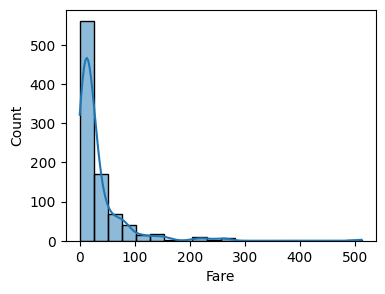

In [243]:
# Visualize Fare column
plt.figure(figsize=(4,3))
sns.histplot(df['Fare'], bins=20,kde=True)

Fare is highly skewed to one side. It may be transformed later

In [244]:
# Ticket column
df['Ticket'].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [245]:
# Extract Ticket Number
df['Ticket'] = df['Ticket'].str.extract('(\d+)')

In [246]:
df['Ticket'].head(10)

0         5
1     17599
2         2
3    113803
4    373450
5    330877
6     17463
7    349909
8    347742
9    237736
Name: Ticket, dtype: object

In [247]:
# Create a new column Group_size from commong ticket numbers
df['Group_size'] = df.groupby('Ticket')['Ticket'].transform('count')

<Axes: xlabel='Group_size', ylabel='Count'>

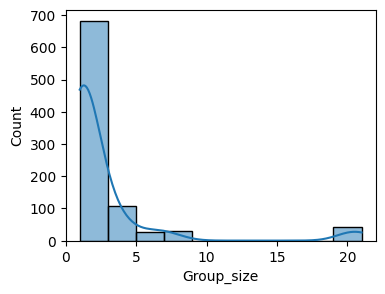

In [248]:
# Visualize Group_size column, with index being the group size
plt.figure(figsize=(4,3))
sns.histplot(df['Group_size'],bins=10,kde=True)

In [249]:
# Visualize Cabin column
df['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [250]:
# Extract Cabin Letter, ignore NaN values
df['Cabin'] = df['Cabin'].str.extract('([A-Za-z])')

In [251]:
df['Cabin'].head(10)

0    NaN
1      C
2    NaN
3      C
4    NaN
5    NaN
6      E
7    NaN
8    NaN
9    NaN
Name: Cabin, dtype: object

<Axes: xlabel='Cabin', ylabel='Count'>

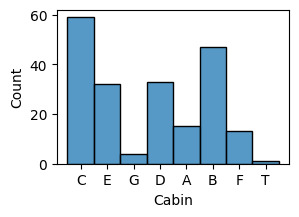

In [252]:
# Visualize Cabin column
plt.figure(figsize=(3,2))
sns.histplot(df['Cabin'])

<Axes: xlabel='Embarked', ylabel='Count'>

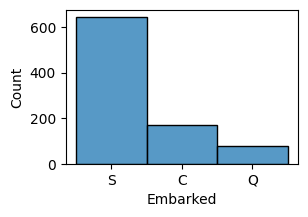

In [253]:
# Visualize Embarked column
plt.figure(figsize=(3,2))
sns.histplot(df['Embarked'])

Bivariate Visualization

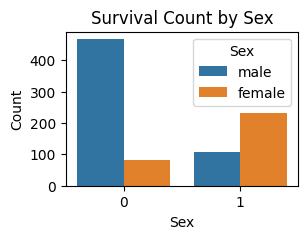

In [254]:
# Visualize Survived per sex
plt.figure(figsize=(3,2))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Count by Sex')
plt.show()

In [255]:
survival_rates = df.groupby('Sex')['Survived'].mean() * 100
survival_rates_df = survival_rates.reset_index()
survival_rates_df.columns = ['Sex', 'Survival Rate']

print(survival_rates_df)

      Sex  Survival Rate
0  female      74.203822
1    male      18.890815


<Axes: xlabel='Survived', ylabel='count'>

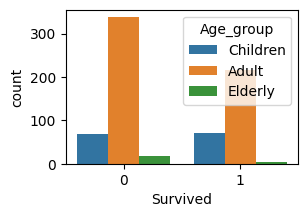

In [256]:
# Visualize Survived per Age_group
plt.figure(figsize=(3,2))
sns.countplot(x='Survived', hue='Age_group', data=df)

In [257]:
# Obtain percentages of survival per Age_group
survival_rates = df.groupby('Age_group')['Survived'].mean() * 100
survival_rates_df = survival_rates.reset_index()
survival_rates_df.columns = ['Age_group', 'Survival Rate']
survival_rates_df

C:\Users\ckpra\AppData\Local\Temp\ipykernel_16140\1217995918.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = df.groupby('Age_group')['Survived'].mean() * 100


,Age_group,Survival Rate
0,Children,50.359712
1,Adult,38.878843
2,Elderly,22.727273


<Axes: xlabel='Sex', ylabel='count'>

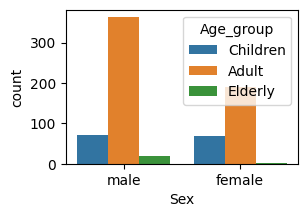

In [258]:
# Visualize Sex per Age_group
plt.figure(figsize=(3,2))
sns.countplot(x='Sex', hue='Age_group', data=df)

<Axes: xlabel='Survived', ylabel='count'>

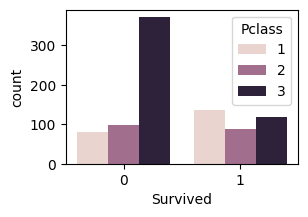

In [259]:
# Visualize Survived per Pclass
plt.figure(figsize=(3,2))
sns.countplot(x='Survived', hue='Pclass', data=df)

In [260]:
# Obtain percentages of survival per Pclass
survival_rates = df.groupby('Pclass')['Survived'].mean() * 100
survival_rates_df = survival_rates.reset_index()
survival_rates_df.columns = ['Pclass', 'Survival Rate']
survival_rates_df

,Pclass,Survival Rate
0,1,62.962963
1,2,47.282609
2,3,24.236253


<Axes: xlabel='Survived', ylabel='count'>

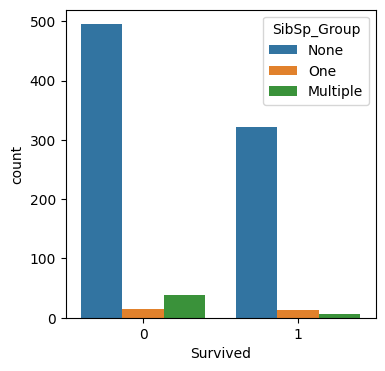

In [261]:
# Visualize Survived per SibSp_Group
plt.figure(figsize=(4,4))
sns.countplot(x='Survived', hue='SibSp_Group', data=df)

<Axes: xlabel='Survived', ylabel='count'>

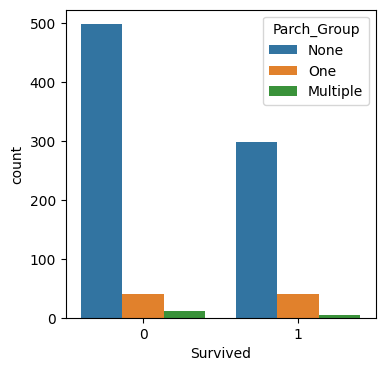

In [262]:
# Visualize Survived per Parch_Group
plt.figure(figsize=(4,4))
sns.countplot(x='Survived', hue='Parch_Group', data=df)


<Axes: xlabel='Cabin', ylabel='count'>

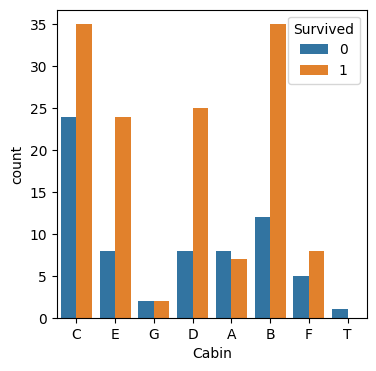

In [263]:
# Visualize Survived per Cabin
plt.figure(figsize=(4,4))
sns.countplot(x='Cabin', hue='Survived', data=df)

In [264]:
# Obtain percentages of survival per Cabin
survival_rates = df.groupby('Cabin')['Survived'].mean() * 100
survival_rates_df = survival_rates.reset_index()
survival_rates_df.columns = ['Cabin', 'Survival Rate']
survival_rates_df

,Cabin,Survival Rate
0,A,46.666667
1,B,74.468085
2,C,59.322034
3,D,75.757576
4,E,75.000000
5,F,61.538462
6,G,50.000000
7,T,0.000000


<Axes: xlabel='Survived', ylabel='count'>

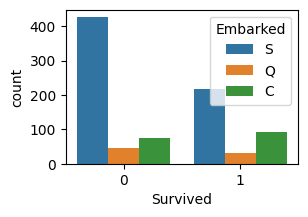

In [265]:
# Visualize Survived per Embarked
plt.figure(figsize=(3,2))
sns.countplot(x='Survived', hue='Embarked', data=df)


In [266]:
# Obtain percentages of survival per Embarked
survival_rates = df.groupby('Embarked')['Survived'].mean() * 100
survival_rates_df = survival_rates.reset_index()
survival_rates_df.columns = ['Embarked', 'Survival Rate']
survival_rates_df

,Embarked,Survival Rate
0,C,55.357143
1,Q,38.961039
2,S,33.695652


<Axes: xlabel='Pclass', ylabel='Fare'>

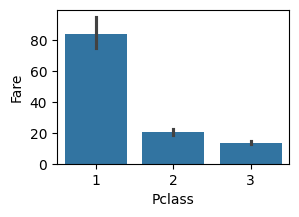

In [267]:
# Visulize Mean Fare per Pclass
plt.figure(figsize=(3,2))
sns.barplot(x='Pclass', y='Fare', data=df, estimator=np.mean)

<Axes: xlabel='Cabin', ylabel='Fare'>

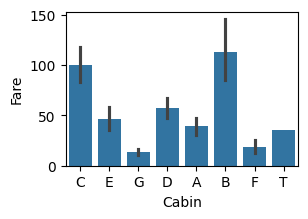

In [268]:
# Visulize Mean Fare per Cabin
plt.figure(figsize=(3,2))
sns.barplot(x='Cabin', y='Fare', data=df, estimator=np.mean)

In [269]:
# Group by Pclass and Cabin and obtain frequency of each Cabin per Pclass
cabin_freq = df.groupby(['Pclass', 'Cabin']).size().unstack()
cabin_freq


Cabin,A,B,C,D,E,F,G,T
Pclass,,,,,,,,
1,15.0,47.0,59.0,29.0,25.0,NaN,NaN,1.0
2,NaN,NaN,NaN,4.0,4.0,8.0,NaN,NaN
3,NaN,NaN,NaN,NaN,3.0,5.0,4.0,NaN


In [270]:
# Obtain percentage of PClass per Embarked
pclass_freq = df.groupby(['Embarked', 'Pclass']).size().unstack()
pclass_freq = pclass_freq.div(pclass_freq.sum(axis=1), axis=0) * 100
pclass_freq

Pclass,1,2,3
Embarked,,,
C,50.595238,10.119048,39.285714
Q,2.597403,3.896104,93.506494
S,19.720497,25.465839,54.813665


In [271]:
# Mean Fare by Embarked
mean_fare = df.groupby('Embarked')['Fare'].mean()
mean_fare

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [272]:
# Survival Rate by Age_group
survival_rate = df.groupby('Age_group')['Survived'].mean()*100
survival_rate

C:\Users\ckpra\AppData\Local\Temp\ipykernel_16140\2488697868.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = df.groupby('Age_group')['Survived'].mean()*100


Age_group
Children    50.359712
Adult       38.878843
Elderly     22.727273
Name: Survived, dtype: float64

Conclusions:
1. Survival rate was ~75% in females and ~20% in males
2. Survival was highest in the order of Pclass 1 > 2 > 3
3. Survival was highest in decks B,D and E. Majority of D and E were in Pclass 1, while B was exclusive 1.
4. Based on survival rate by embarked, it was C > S > Q, with C being disproportionately higher. The distribution of class 1 was highest in C.
5. This is supported by the fact that Mean Fare is highest in C. The order of mean fare is the same as that of the survival rate.
6. Survival Rate increases with Female, better PClass (1) and decreases with increasing age group.


2. Handling Missing Values

In [273]:
df.isnull().sum()

Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           4
Fare             0
Cabin          687
Embarked         2
Age_group      177
SibSp_Group      0
Parch_Group      0
Group_size       4
dtype: int64

In [274]:
# Drop Age, SibSp, Parch, Ticket and Name columns
df.drop(['Age', 'SibSp', 'Parch'], axis=1, inplace=True)

In [275]:
df.isnull().sum()

Survived         0
Pclass           0
Name             0
Sex              0
Ticket           4
Fare             0
Cabin          687
Embarked         2
Age_group      177
SibSp_Group      0
Parch_Group      0
Group_size       4
dtype: int64

In [276]:
# Handle Missing Values in Embarked, by filling with Mode
embarked_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(embarked_mode, inplace=True)


C:\Users\ckpra\AppData\Local\Temp\ipykernel_16140\3897778168.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(embarked_mode, inplace=True)
